In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sol = pd.read_csv('/content/Albedo_Map.csv')
ti = pd.read_csv('/content/LPTi_Map.csv')
fe = pd.read_csv('/content/LPFe_Map.csv')
th = pd.read_csv('/content/LPTh_Map.csv')
K = pd.read_csv('/content/LPK_Map.csv')

In [ ]:
sol = sol.values.flatten()
ti = ti.values.flatten()
fe = fe.values.flatten()
th = th.values.flatten()
K = K.values.flatten()

In [ ]:
Albedo_Map =  sol.reshape(len(sol),1)
Fe_Map =  fe.reshape(len(fe),1)
Ti_Map =  ti.reshape(len(ti),1)
Th_Map =  th.reshape(len(th),1)
K_Map =  K.reshape(len(K),1)

In [ ]:
Sol = np.hstack((Fe_Map ,Ti_Map , Th_Map , K_Map , Albedo_Map))

In [ ]:
dfs = pd.DataFrame(Sol, columns =['Fe', 'Ti', 'Th','K','Albedo']) 

In [ ]:
df.to_csv('Final_File_here.csv')

In [ ]:
df = pd.read_csv('/content/Final_File_here.csv')

In [ ]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [ ]:
df.tail()

,Fe,Ti,Th,K,Albedo
259195,3.82753,0.112137,0.79856,455.07,0.350174
259196,3.82753,0.112137,0.79856,455.07,0.378339
259197,3.82753,0.112137,0.79856,455.07,0.361495
259198,3.82753,0.112137,0.79856,455.07,0.346139
259199,3.82753,0.112137,0.79856,455.07,0.392665


In [ ]:
# DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
#                       max_features=None, max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, presort='deprecated',
#                       random_state=3246, splitter='best')

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:



# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3246, splitter='best')


regressor.fit(X_train, y_train)

# Predicting a new result
#regressor.predict([[6.5]])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3246, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# example of calculate the mean squared error
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# report error
print(errors)

0.00036589208190637354


In [ ]:
print(len(y_pred))

51840


(0.09514130055352098,
 0.5135307580277959,
 0.12485473759002187,
 0.5432441950642968)

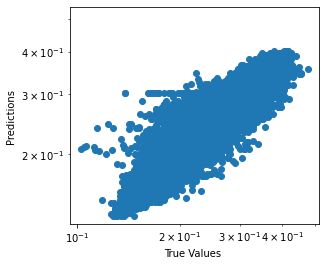

In [ ]:

import matplotlib.pyplot as plt

g=plt.scatter(y_test, y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

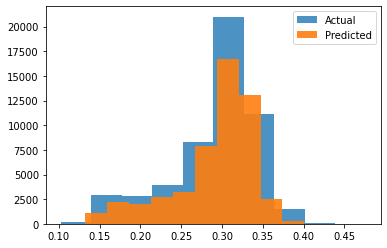

In [ ]:
import random
import numpy
from matplotlib import pyplot





pyplot.hist(y_test,  alpha=0.8, label='Actual')
pyplot.hist(y_pred, alpha=0.9, label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()